<a href="https://colab.research.google.com/github/Serran0Juan/finanzas-trabajo-practico-2025/blob/main/DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------------

## **A. Construcción del Dataset**

--------------------------------------------------------------------------------

### *1) Obtención de datos histórico diarios de los ultimos 5 años*

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Período de análisis: últimos 5 años
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print(f"Período de análisis: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}")
print(f"Duración: 5 años de datos históricos diarios")

def obtener_datos_financieros(tickers, start_date, end_date, nombre_dataset):
    """
    Función para obtener datos financieros históricos con validación
    """
    print(f"\nObteniendo datos para {nombre_dataset}...")
    datos = {}
    resumen = []

    for nombre, ticker in tickers.items():
        try:
            print(f"  • Descargando {nombre} ({ticker})...")
            stock = yf.Ticker(ticker)
            data = stock.history(start=start_date, end=end_date)

            if len(data) > 0:
                datos[nombre] = data
                resumen.append({
                    'Activo': nombre,
                    'Ticker': ticker,
                    'Registros': len(data),
                    'Desde': data.index[0].strftime('%Y-%m-%d'),
                    'Hasta': data.index[-1].strftime('%Y-%m-%d'),
                    'Precio_Inicial': data['Close'].iloc[0],
                    'Precio_Final': data['Close'].iloc[-1],
                    'Status': '✓ OK'
                })
                print(f"    ✓ {len(data)} registros obtenidos")
            else:
                resumen.append({
                    'Activo': nombre,
                    'Ticker': ticker,
                    'Registros': 0,
                    'Status': '✗ Sin datos'
                })
                print(f"    ✗ No se obtuvieron datos para {ticker}")

        except Exception as e:
            resumen.append({
                'Activo': nombre,
                'Ticker': ticker,
                'Registros': 0,
                'Status': f'✗ Error: {str(e)[:30]}...'
            })
            print(f"    ✗ Error al obtener {ticker}: {str(e)}")

    return datos, pd.DataFrame(resumen)

# =============================================================================
# DEFINICIÓN DE CARTERA Y OBTENCIÓN DE DATOS
# =============================================================================

# Cartera de 5 acciones: YPF + 4 comparables
tickers_cartera = {
    'YPF': 'YPF',
    'Pampa Energia': 'PAM',
    'Vista': 'VIST',
    'Ecopetrol': 'EC',
    'Petrobras': 'PBR'
}

# Obtener datos de la cartera
datos_cartera, resumen_cartera = obtener_datos_financieros(
    tickers_cartera, start_date, end_date, "CARTERA PRINCIPAL"
)

# Mostrar resumen
print("\n" + "="*60)
print("RESUMEN DE DATOS OBTENIDOS")
print("="*60)
print(resumen_cartera.to_string(index=False))

Período de análisis: 2020-08-16 a 2025-08-15
Duración: 5 años de datos históricos diarios

Obteniendo datos para CARTERA PRINCIPAL...
  • Descargando YPF (YPF)...
    ✓ 1255 registros obtenidos
  • Descargando Pampa Energia (PAM)...
    ✓ 1255 registros obtenidos
  • Descargando Vista (VIST)...
    ✓ 1255 registros obtenidos
  • Descargando Ecopetrol (EC)...
    ✓ 1255 registros obtenidos
  • Descargando Petrobras (PBR)...
    ✓ 1255 registros obtenidos

RESUMEN DE DATOS OBTENIDOS
       Activo Ticker  Registros      Desde      Hasta  Precio_Inicial  Precio_Final Status
          YPF    YPF       1255 2020-08-17 2025-08-14        5.440000     32.689999   ✓ OK
Pampa Energia    PAM       1255 2020-08-17 2025-08-14       10.780000     74.279999   ✓ OK
        Vista   VIST       1255 2020-08-17 2025-08-14        3.100000     41.419998   ✓ OK
    Ecopetrol     EC       1255 2020-08-17 2025-08-14        6.268036      8.720000   ✓ OK
    Petrobras    PBR       1255 2020-08-17 2025-08-14      

### *2) Empresas Comparables*




📊 CUADRO COMPARATIVO DE EMPRESAS SELECCIONADAS
------------------------------------------------------------


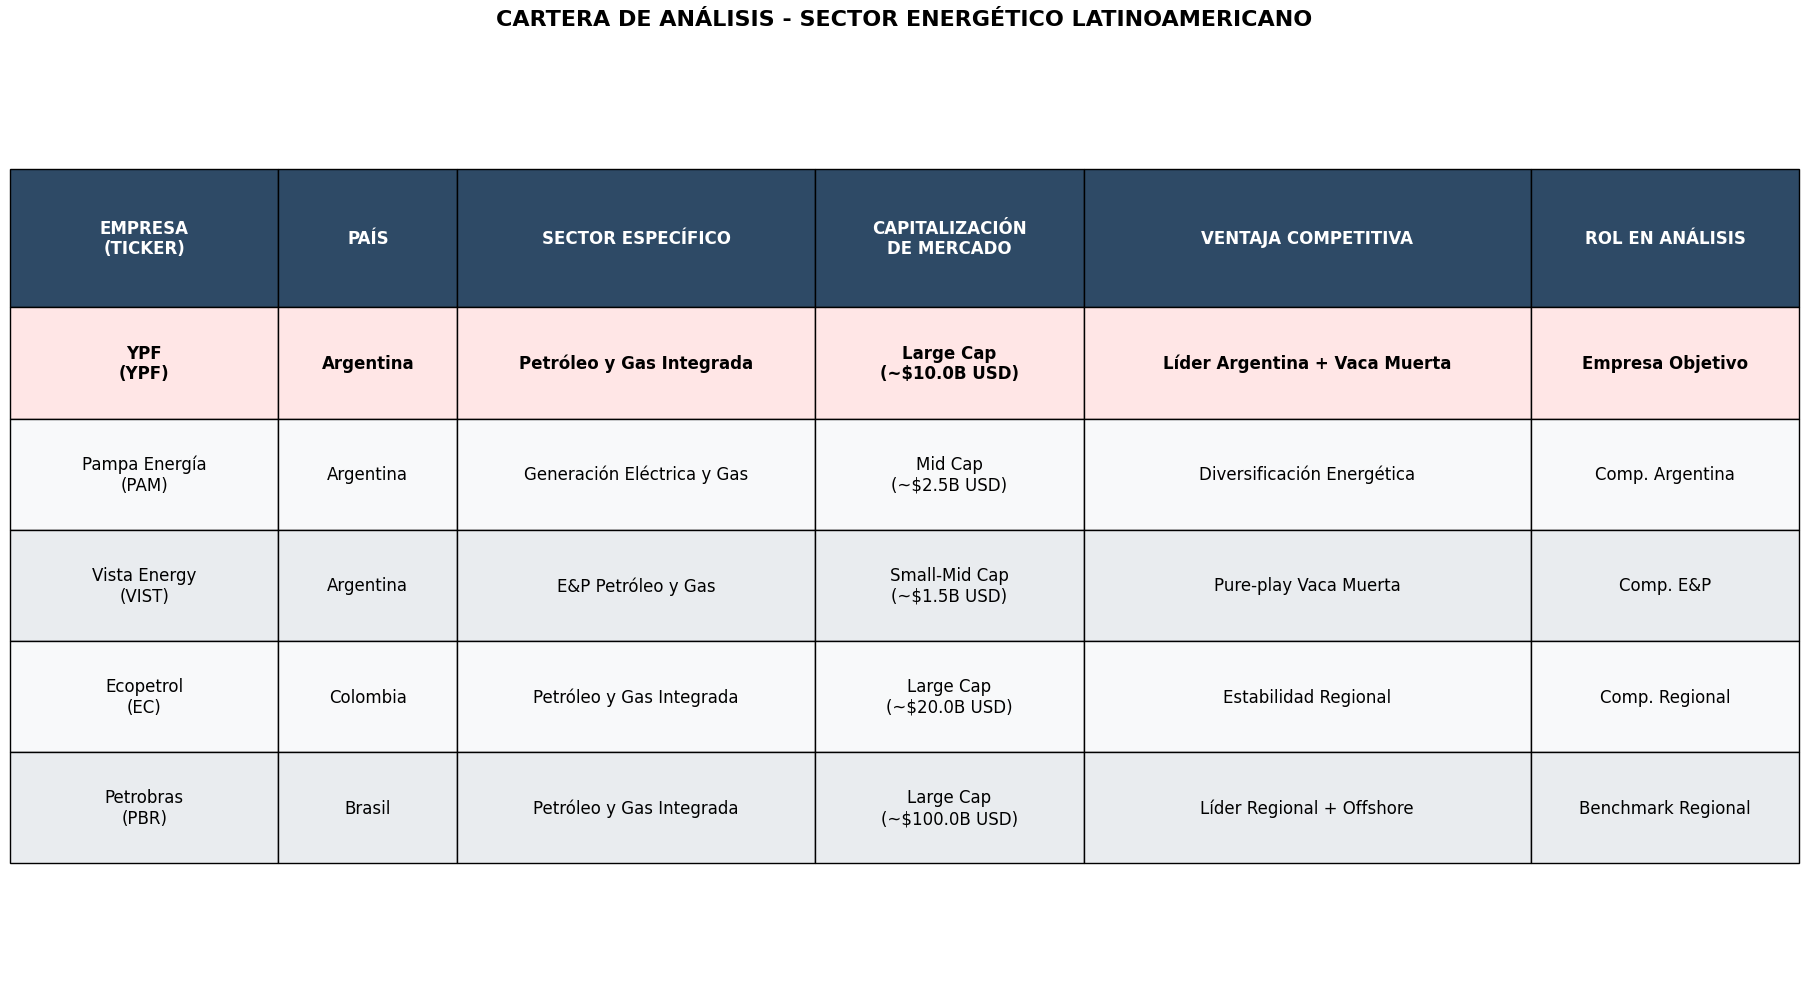

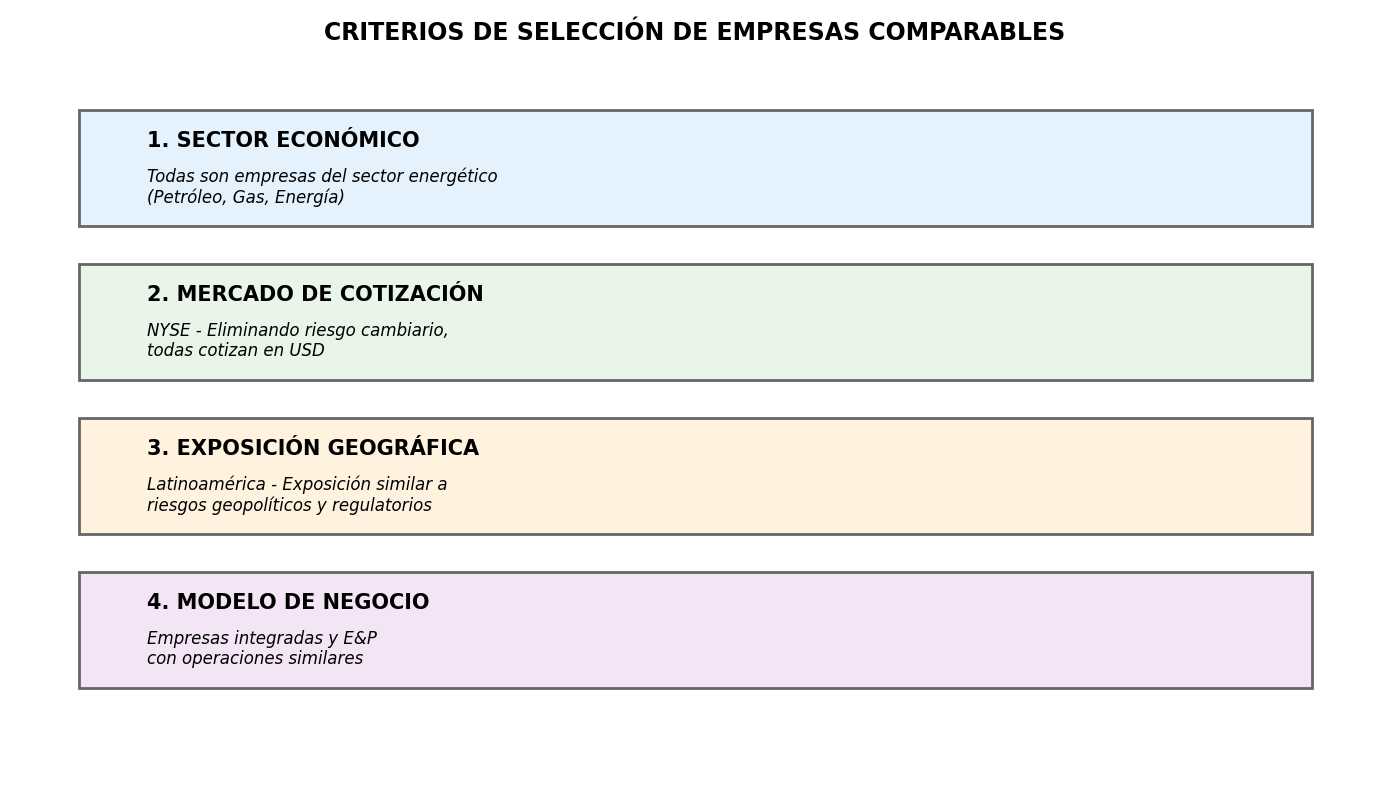

In [42]:
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10 # Keep this as a base, adjust per plot as needed

# Definición de tickers en NYSE
portfolio = {
    'YPF': 'YPF',              # YPF S.A. - Argentina
    'PAM': 'PAM',              # Pampa Energía ADR
    'VIST': 'VIST',            # Vista Energy
    'EC': 'EC',              # Ecopetrol ADR
    'PBR': 'PBR'               # Petrobras ADR
}

# Datos estructurados para justificación
empresas_data = {
    'Empresa': ['YPF', 'Pampa Energía', 'Vista Energy', 'Ecopetrol', 'Petrobras'],
    'Ticker': ['YPF', 'PAM', 'VIST', 'EC', 'PBR'],
    'País': ['Argentina', 'Argentina', 'Argentina', 'Colombia', 'Brasil'],
    'Sector_Específico': ['Petróleo y Gas Integrada', 'Generación Eléctrica y Gas', 'E&P Petróleo y Gas', 'Petróleo y Gas Integrada', 'Petróleo y Gas Integrada'],
    'Cap_Mercado_Categoria': ['Large Cap', 'Mid Cap', 'Small-Mid Cap', 'Large Cap', 'Large Cap'],
    'Cap_Mercado_USD_B': [10, 2.5, 1.5, 20, 100],  # Valores aproximados en billones USD
    'Modelo_Negocio': ['Integrada', 'Eléctrica + Gas', 'E&P Puro', 'Integrada', 'Integrada'],
    'Ventaja_Principal': ['Líder Argentina + Vaca Muerta', 'Diversificación Energética', 'Pure-play Vaca Muerta', 'Estabilidad Regional', 'Líder Regional + Offshore'],
    'Rol_Análisis': ['Empresa Objetivo', 'Comp. Argentina', 'Comp. E&P', 'Comp. Regional', 'Benchmark Regional']
}

# Crear DataFrame para justificación
df_empresas = pd.DataFrame(empresas_data)

# Información detallada para justificación textual (Mantener la variable por si se usa más adelante, pero no imprimirla aquí)
justificacion_detallada = {
    'YPF (YPF)': {
        'descripcion': 'Empresa principal - Líder integrada de energía en Argentina',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$8-12B USD)',
        'ventaja': 'Líder en Argentina, operaciones Vaca Muerta',
        'justificacion': 'Empresa objetivo del análisis'
    },
    'Pampa Energía (PAM)': {
        'descripcion': 'Empresa energética integrada argentina (ADR)',
        'sector': 'Energía - Generación Eléctrica y Gas',
        'mercado': 'NYSE',
        'cap_mercado': 'Mid Cap (~$2-3B USD)',
        'ventaja': 'Diversificación energética, mismo país',
        'justificacion': 'Misma exposición al riesgo argentino, sector energético complementario'
    },
    'Vista Energy (VIST)': {
        'descripcion': 'Empresa de E&P enfocada en Vaca Muerta',
        'sector': 'Energía - E&P Petróleo y Gas',
        'mercado': 'NYSE',
        'cap_mercado': 'Small-Mid Cap (~$1-2B USD)',
        'ventaja': 'Pure-play Vaca Muerta, tecnología avanzada',
        'justificacion': 'Mismo play geológico que YPF, modelo E&P puro'
    },
    'Ecopetrol (EC)': {
        'descripcion': 'Empresa petrolera integrada de Colombia (ADR)',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$15-25B USD)',
        'ventaja': 'Modelo integrado, mercado latinoamericano estable',
        'justificacion': 'Comparable regional LatAm, modelo de negocio similar'
    },
    'Petrobras (PBR)': {
        'descripcion': 'Empresa petrolera integrada de Brasil (ADR)',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$80-120B USD)',
        'ventaja': 'Líder regional, offshore expertise, dividendos',
        'justificacion': 'Benchmak regional, escala de operaciones, modelo integrado'
    }
}

# =============================================================================
# 1. TABLA PRINCIPAL ESTILIZADA (Cuadro Comparativo)
# =============================================================================

print("\n\n📊 CUADRO COMPARATIVO DE EMPRESAS SELECCIONADAS")
print("-" * 60)

def crear_tabla_principal():
    """Crear tabla principal con formato profesional"""

    # Preparar datos para la tabla
    tabla_data = []
    for i, row in df_empresas.iterrows():
        tabla_data.append([
            f"{row['Empresa']}\n({row['Ticker']})",
            row['País'],
            row['Sector_Específico'],
            f"{row['Cap_Mercado_Categoria']}\n(~${row['Cap_Mercado_USD_B']}B USD)",
            row['Ventaja_Principal'],
            row['Rol_Análisis']
        ])

    # Crear figura
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.axis('tight')
    ax.axis('off')

    # Crear tabla
    table = ax.table(
        cellText=tabla_data,
        colLabels=['EMPRESA\n(TICKER)', 'PAÍS', 'SECTOR ESPECÍFICO', 'CAPITALIZACIÓN\nDE MERCADO', 'VENTAJA COMPETITIVA', 'ROL EN ANÁLISIS'],
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.1, 0.2, 0.15, 0.25, 0.15]
    )

    # Estilizar tabla
    table.auto_set_font_size(False)
    table.set_fontsize(12) # Increased font size here
    table.scale(1.2, 3) # Increased scale slightly

    # Colores de header
    for i in range(len(tabla_data[0])):
        table[(0, i)].set_facecolor('#2E4A66')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.15)

    # Colores alternados para filas
    colors = ['#F8F9FA', '#E9ECEF']
    for i in range(1, len(tabla_data) + 1):
        for j in range(len(tabla_data[0])):
            table[(i, j)].set_facecolor(colors[i % 2])
            table[(i, j)].set_height(0.12)

            # Destacar empresa objetivo (YPF)
            if i == 1:  # YPF es la primera fila
                table[(i, j)].set_facecolor('#FFE6E6')
                table[(i, j)].set_text_props(weight='bold')

    plt.title('CARTERA DE ANÁLISIS - SECTOR ENERGÉTICO LATINOAMERICANO',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_tabla_principal()


# =============================================================================
# 2. CRITERIOS DE SELECCIÓN EN CUADRO INFORMATIVO
# =============================================================================


def mostrar_cuadro_criterios():
    """Mostrar criterios en formato de cuadro informativo"""

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('off')

    # Criterios de selección
    criterios = [
        "1. SECTOR ECONÓMICO",
        "Todas son empresas del sector energético\n(Petróleo, Gas, Energía)",

        "2. MERCADO DE COTIZACIÓN",
        "NYSE - Eliminando riesgo cambiario,\ntodas cotizan en USD",

        "3. EXPOSICIÓN GEOGRÁFICA",
        "Latinoamérica - Exposición similar a\nriesgos geopolíticos y regulatorios",

        "4. MODELO DE NEGOCIO",
        "Empresas integradas y E&P\ncon operaciones similares"
    ]

    # Crear cajas de texto
    from matplotlib.patches import Rectangle
    colors = ['#E3F2FD', '#E8F5E8', '#FFF3E0', '#F3E5F5']
    y_positions = [0.8, 0.6, 0.4, 0.2]

    for i in range(0, len(criterios), 2):
        criterio_titulo = criterios[i]
        criterio_desc = criterios[i+1]
        y_pos = y_positions[i//2]

        # Caja principal
        rect = Rectangle((0.05, y_pos-0.08), 0.9, 0.15,
                        facecolor=colors[i//2], edgecolor='#666666', linewidth=2)
        ax.add_patch(rect)

        # Título
        ax.text(0.1, y_pos+0.03, criterio_titulo, fontsize=15, fontweight='bold', # Increased title font size
               verticalalignment='center')

        # Descripción
        ax.text(0.1, y_pos-0.03, criterio_desc, fontsize=12, # Increased description font size
               verticalalignment='center', style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES',
                fontsize=17, fontweight='bold', y=0.95) # Increased main title font size

    plt.tight_layout()
    plt.show()

mostrar_cuadro_criterios()

# Guardar justificacion_detallada en variables globales si es necesario para pasos posteriores
globals()['justificacion_empresas'] = justificacion_detallada

### *2)a. Visualización de Cartera*


Obteniendo datos para Cartera de Acciones...
  • Descargando YPF (YPF)...
    ✓ 1255 registros obtenidos
  • Descargando PAM (PAM)...
    ✓ 1255 registros obtenidos
  • Descargando VIST (VIST)...
    ✓ 1255 registros obtenidos
  • Descargando EC (EC)...
    ✓ 1255 registros obtenidos
  • Descargando PBR (PBR)...
    ✓ 1255 registros obtenidos

🧹 PROCESANDO DATOS DE CARTERA...
Antes de limpieza: 1255 filas
Después de eliminar NaN: 1255 filas
Filas eliminadas: 0
Completitud de datos: 100.0%

🧹 PROCESANDO DATOS DE BENCHMARKS...
Antes de limpieza: 1255 filas
Después de eliminar NaN: 1255 filas
Filas eliminadas: 0
Completitud de datos: 100.0%
VISUALIZACIÓN DEL DATASET
------------------------------------------------------------


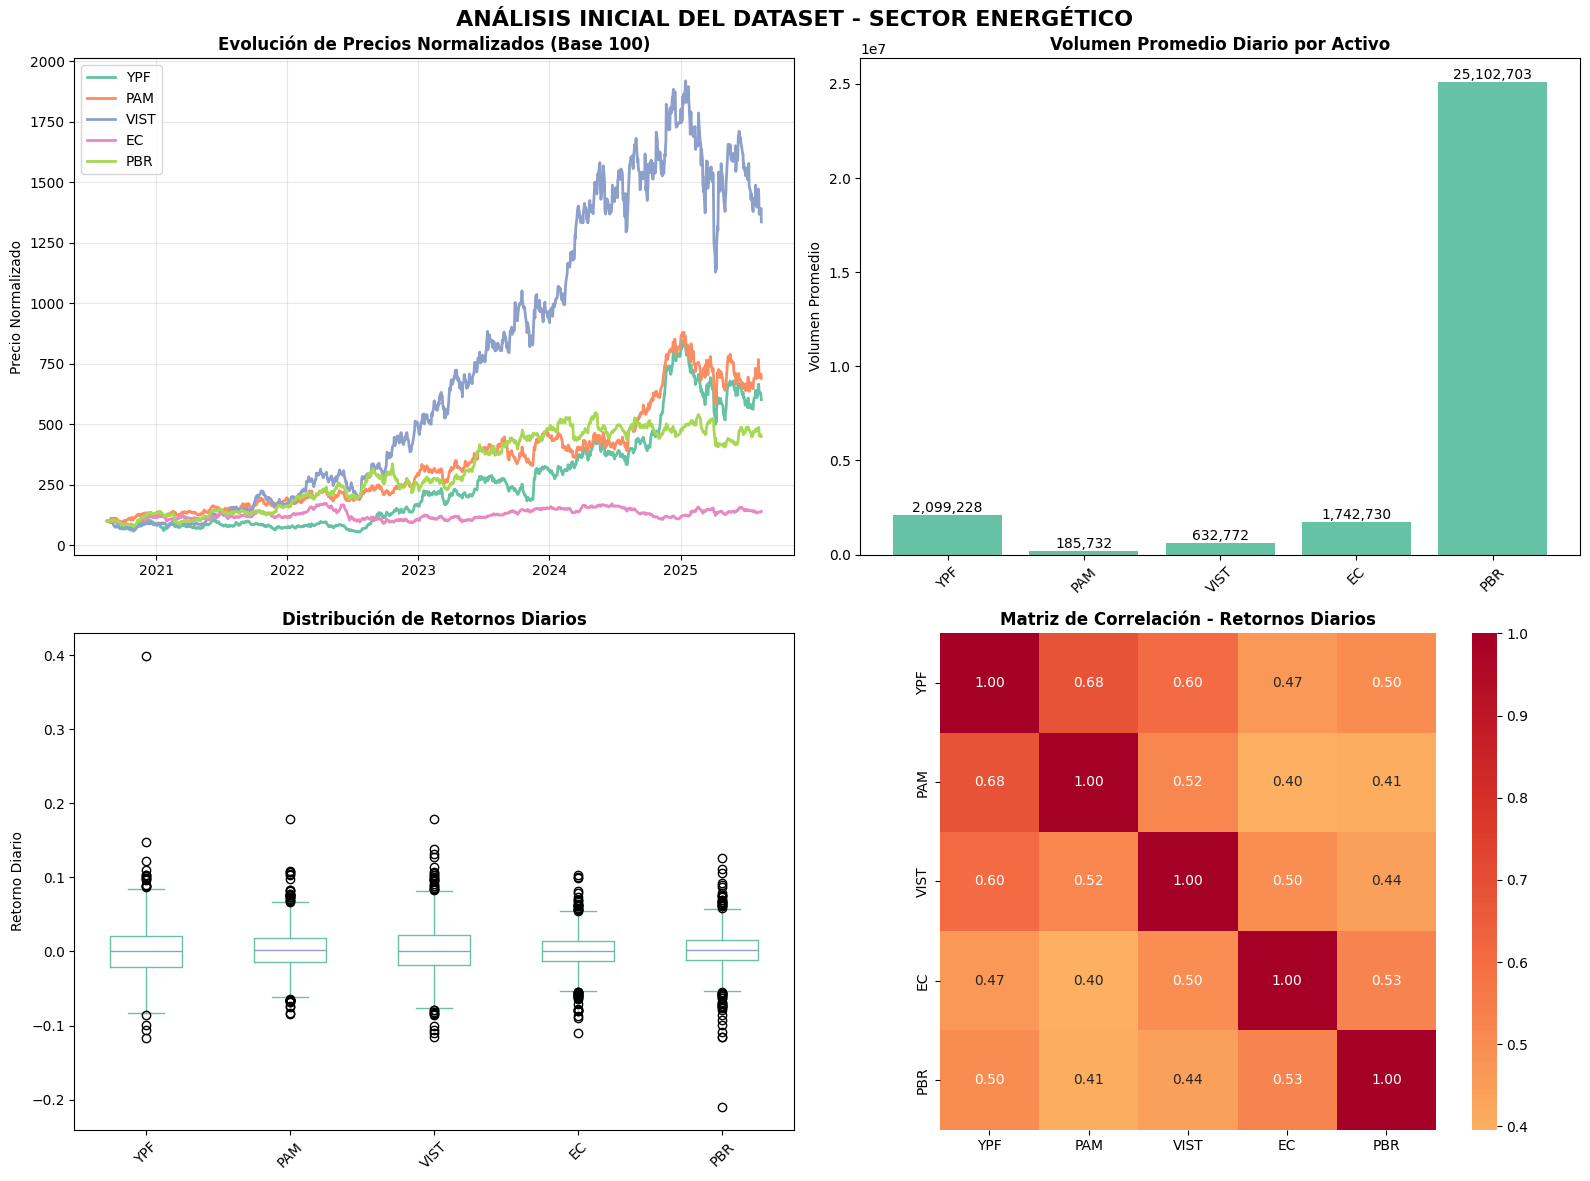

In [43]:
# Obtener datos de la cartera
portfolio_data, resumen_cartera = obtener_datos_financieros(portfolio, start_date, end_date, "Cartera de Acciones")

# Procesar datos
precios_cartera, volumenes_cartera = procesar_datos(portfolio_data, "datos de cartera")
precios_benchmarks, volumenes_benchmarks = procesar_datos(benchmark_data, "datos de benchmarks")

print("VISUALIZACIÓN DEL DATASET")
print("-" * 60)

if len(precios_cartera) > 0:

    # Crear subplots para visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ANÁLISIS INICIAL DEL DATASET - SECTOR ENERGÉTICO', fontsize=16, fontweight='bold')

    # 1. Evolución de precios normalizados (base 100)
    precios_norm = (precios_cartera / precios_cartera.iloc[0]) * 100
    ax1 = axes[0, 0]
    for col in precios_norm.columns:
        ax1.plot(precios_norm.index, precios_norm[col], label=col, linewidth=2)
    ax1.set_title('Evolución de Precios Normalizados (Base 100)', fontweight='bold')
    ax1.set_ylabel('Precio Normalizado')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Volúmenes promedio por activo
    if len(volumenes_cartera) > 0:
        vol_promedio = volumenes_cartera.mean()
        ax2 = axes[0, 1]
        bars = ax2.bar(vol_promedio.index, vol_promedio.values)
        ax2.set_title('Volumen Promedio Diario por Activo', fontweight='bold')
        ax2.set_ylabel('Volumen Promedio')
        ax2.tick_params(axis='x', rotation=45)

        # Añadir valores en las barras
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}', ha='center', va='bottom')

    # 3. Distribución de retornos diarios
    retornos_diarios = precios_cartera.pct_change().dropna()
    ax3 = axes[1, 0]
    retornos_diarios.plot(kind='box', ax=ax3)
    ax3.set_title('Distribución de Retornos Diarios', fontweight='bold')
    ax3.set_ylabel('Retorno Diario')
    ax3.tick_params(axis='x', rotation=45)

    # 4. Matriz de correlación inicial
    correlacion = retornos_diarios.corr()
    ax4 = axes[1, 1]
    sns.heatmap(correlacion, annot=True, cmap='RdYlBu_r', center=0,
                square=True, ax=ax4, fmt='.2f')
    ax4.set_title('Matriz de Correlación - Retornos Diarios', fontweight='bold')

    plt.tight_layout()
    plt.show()

### *3) Doc y fuentes*


In [44]:
print("DOCUMENTACIÓN DE FUENTES DE DATOS Y METODOLOGÍA")
print("-" * 60)

# Información de fuentes
fuentes_info = {
    'Fuente Principal': 'Yahoo Finance API (yfinance)',
    'Cobertura Temporal': f'{start_date.strftime("%Y-%m-%d")} a {end_date.strftime("%Y-%m-%d")}',
    'Frecuencia': 'Diaria',
    'Moneda Base': 'USD (NYSE)',
    'Campos Obtenidos': ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
}

print("🔍 FUENTES DE DATOS:")
for key, value in fuentes_info.items():
    print(f"• {key}: {value}")

def procesar_datos(datos_dict, tipo_datos):
    """
    Función para procesar y limpiar datos financieros
    """
    print(f"\n🧹 PROCESANDO {tipo_datos.upper()}...")

    # Crear DataFrame con precios de cierre
    precios_cierre = pd.DataFrame()
    volumenes = pd.DataFrame()

    for nombre, data in datos_dict.items():
        if len(data) > 0:
            precios_cierre[nombre] = data['Close']
            volumenes[nombre] = data['Volume']

    # Información antes de limpieza
    filas_iniciales = len(precios_cierre)
    print(f"Antes de limpieza: {filas_iniciales} filas")

    # Eliminar valores nulos
    precios_cierre = precios_cierre.dropna()
    filas_finales = len(precios_cierre)
    print(f"Después de eliminar NaN: {filas_finales} filas")
    print(f"Filas eliminadas: {filas_iniciales - filas_finales}")

    # Estadísticas de completitud
    if len(precios_cierre) > 0:
        total_cells = len(precios_cierre.columns) * len(precios_cierre)
        filled_cells = precios_cierre.count().sum()
        completitud = (filled_cells / total_cells) * 100
        print(f"Completitud de datos: {completitud:.1f}%")

    return precios_cierre, volumenes

print("\n📋 METODOLOGÍA DE LIMPIEZA:")
metodologia_limpieza = [
    "1. Validación de disponibilidad de datos por ticker",
    "2. Verificación de rangos de fechas completos",
    "3. Eliminación de valores nulos (NaN) y registros incompletos",
    "4. Alineación temporal entre todos los activos",
    "5. Verificación de continuidad en días de trading",
    "6. Validación de coherencia en precios (no negativos, outliers)",
    "7. Sincronización de calendarios bursátiles"
]

for item in metodologia_limpieza:
    print(f"  {item}")

DOCUMENTACIÓN DE FUENTES DE DATOS Y METODOLOGÍA
------------------------------------------------------------
🔍 FUENTES DE DATOS:
• Fuente Principal: Yahoo Finance API (yfinance)
• Cobertura Temporal: 2020-08-16 a 2025-08-15
• Frecuencia: Diaria
• Moneda Base: USD (NYSE)
• Campos Obtenidos: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

📋 METODOLOGÍA DE LIMPIEZA:
  1. Validación de disponibilidad de datos por ticker
  2. Verificación de rangos de fechas completos
  3. Eliminación de valores nulos (NaN) y registros incompletos
  4. Alineación temporal entre todos los activos
  5. Verificación de continuidad en días de trading
  6. Validación de coherencia en precios (no negativos, outliers)
  7. Sincronización de calendarios bursátiles


### *4) Indices de referencia*

JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA
------------------------------------------------------------


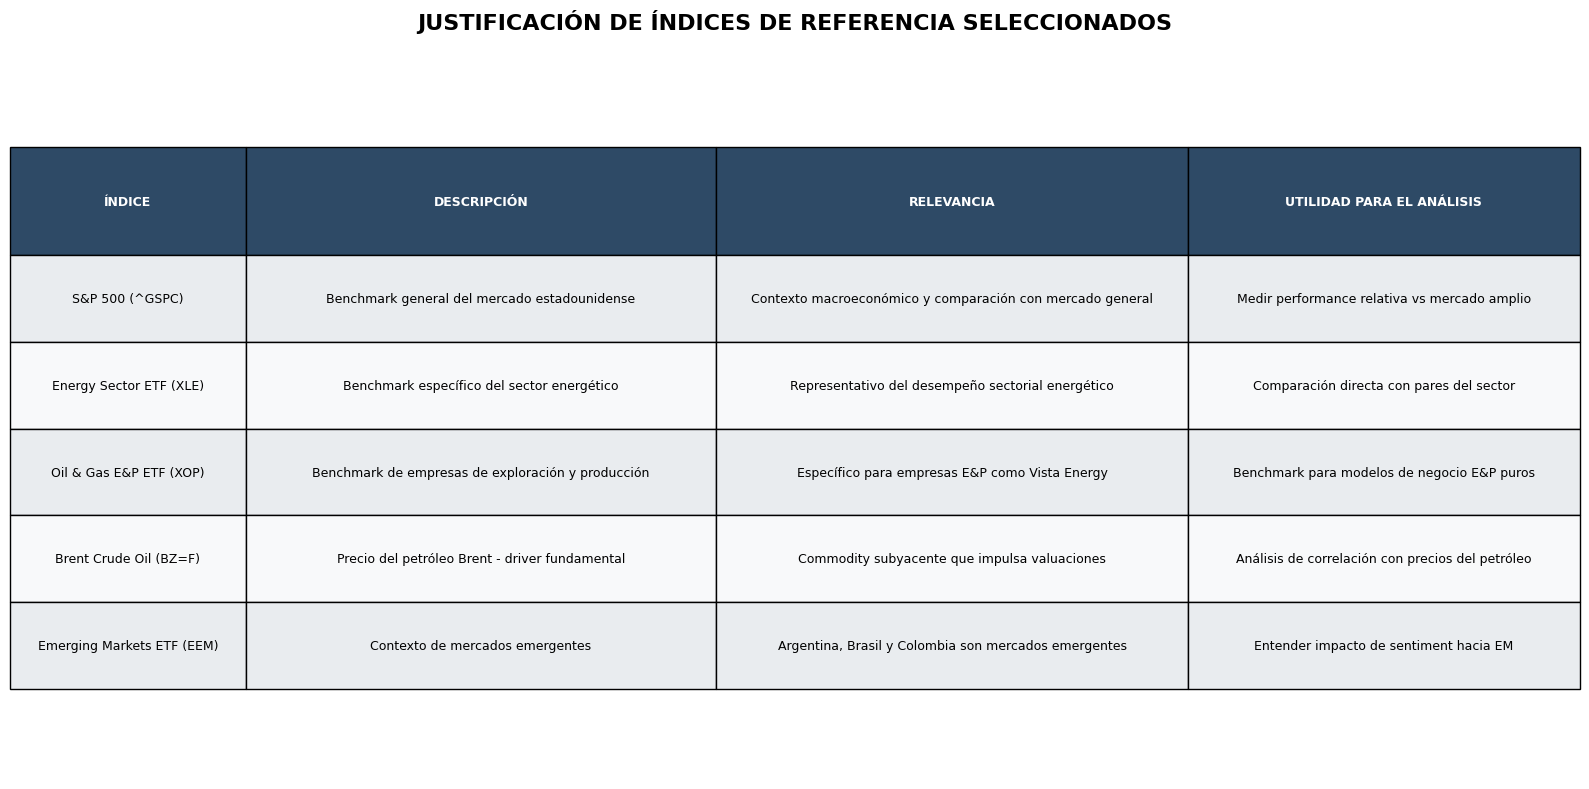


🔄 OBTENIENDO DATOS DE BENCHMARKS...

Obteniendo datos para Índices de Referencia...
  • Descargando S&P500 (^GSPC)...
    ✓ 1255 registros obtenidos
  • Descargando XLE (XLE)...
    ✓ 1255 registros obtenidos
  • Descargando XOP (XOP)...
    ✓ 1255 registros obtenidos
  • Descargando BRENT (BZ=F)...
    ✓ 1258 registros obtenidos
  • Descargando EM (EEM)...
    ✓ 1255 registros obtenidos

RESUMEN DE DATOS DE BENCHMARKS OBTENIDOS
Activo Ticker  Registros      Desde      Hasta  Precio_Inicial  Precio_Final Status
S&P500  ^GSPC       1255 2020-08-17 2025-08-14     3381.989990   6468.540039   ✓ OK
   XLE    XLE       1255 2020-08-17 2025-08-14       31.037821     85.559998   ✓ OK
   XOP    XOP       1255 2020-08-17 2025-08-14       49.616940    125.150002   ✓ OK
 BRENT   BZ=F       1258 2020-08-17 2025-08-14       45.369999     66.709999   ✓ OK
    EM    EEM       1255 2020-08-17 2025-08-14       40.021191     49.880001   ✓ OK


In [45]:
# Índices de referencia relevantes para el sector
benchmarks = {
    'S&P500': '^GSPC',         # S&P 500 (Mercado General)
    'XLE': 'XLE',              # Energy Select Sector SPDR (Sector Energía)
    'XOP': 'XOP',              # SPDR S&P Oil & Gas E&P ETF (E&P específico)
    'BRENT': 'BZ=F',           # Brent Crude Oil (Commodity base)
    'EM': 'EEM'                # iShares MSCI Emerging Markets (Mercados Emergentes)
}

print("JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA")
print("-" * 60)

indices_info = {
    'S&P 500 (^GSPC)': {
        'descripcion': 'Benchmark general del mercado estadounidense',
        'relevancia': 'Contexto macroeconómico y comparación con mercado general',
        'utilidad': 'Medir performance relativa vs mercado amplio'
    },
    'Energy Sector ETF (XLE)': {
        'descripcion': 'Benchmark específico del sector energético',
        'relevancia': 'Representativo del desempeño sectorial energético',
        'utilidad': 'Comparación directa con pares del sector'
    },
    'Oil & Gas E&P ETF (XOP)': {
        'descripcion': 'Benchmark de empresas de exploración y producción',
        'relevancia': 'Específico para empresas E&P como Vista Energy',
        'utilidad': 'Benchmark para modelos de negocio E&P puros'
    },
    'Brent Crude Oil (BZ=F)': {
        'descripcion': 'Precio del petróleo Brent - driver fundamental',
        'relevancia': 'Commodity subyacente que impulsa valuaciones',
        'utilidad': 'Análisis de correlación con precios del petróleo'
    },
    'Emerging Markets ETF (EEM)': {
        'descripcion': 'Contexto de mercados emergentes',
        'relevancia': 'Argentina, Brasil y Colombia son mercados emergentes',
        'utilidad': 'Entender impacto de sentiment hacia EM'
    }
}

# Crear DataFrame para la tabla de índices
indices_table_data = []
for indice, info in indices_info.items():
    indices_table_data.append([
        indice,
        info['descripcion'],
        info['relevancia'],
        info['utilidad']
    ])

# =============================================================================
# MOSTRAR TABLA DE JUSTIFICACIÓN DE ÍNDICES
# =============================================================================

def crear_tabla_indices(data):
    """Crear tabla de justificación de índices con formato profesional"""

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(
        cellText=data,
        colLabels=['ÍNDICE', 'DESCRIPCIÓN', 'RELEVANCIA', 'UTILIDAD PARA EL ANÁLISIS'],
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.3, 0.3, 0.25]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)

    # Estilizar header
    for i in range(len(data[0])):
        table[(0, i)].set_facecolor('#2E4A66')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.15)

    # Colores alternados para filas
    colors = ['#F8F9FA', '#E9ECEF']
    for i in range(1, len(data) + 1):
        for j in range(len(data[0])):
            table[(i, j)].set_facecolor(colors[i % 2])
            table[(i, j)].set_height(0.12)

    plt.title('JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA SELECCIONADOS',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_tabla_indices(indices_table_data)


# Obtener datos de benchmarks
print("\n🔄 OBTENIENDO DATOS DE BENCHMARKS...")
benchmark_data, resumen_benchmarks = obtener_datos_financieros(benchmarks, start_date, end_date, "Índices de Referencia")

print("\n" + "="*60)
print("RESUMEN DE DATOS DE BENCHMARKS OBTENIDOS")
print("="*60)
print(resumen_benchmarks.to_string(index=False))

# Guardar benchmark_data en variables globales si es necesario para pasos posteriores
globals()['benchmark_data'] = benchmark_data
globals()['resumen_benchmarks'] = resumen_benchmarks

### *4)a Estadistica descrptiva*

In [46]:
print("ESTADÍSTICAS DESCRIPTIVAS DEL DATASET")
print("-" * 60)

if len(precios_cartera) > 0:

    # Calcular retornos diarios
    retornos_diarios = precios_cartera.pct_change().dropna()

    # Tabla resumen de estadísticas de precios
    estadisticas_precios = pd.DataFrame({
        'Precio_Inicial_USD': precios_cartera.iloc[0],
        'Precio_Final_USD': precios_cartera.iloc[-1],
        'Precio_Promedio_USD': precios_cartera.mean(),
        'Precio_Max_USD': precios_cartera.max(),
        'Precio_Min_USD': precios_cartera.min(),
        'Desv_Std_Precio': precios_cartera.std()
    })

    # Estadísticas de retornos
    estadisticas_retornos = pd.DataFrame({
        'Retorno_Total_%': ((precios_cartera.iloc[-1] / precios_cartera.iloc[0]) - 1) * 100,
        'Retorno_Promedio_Diario_%': retornos_diarios.mean() * 100,
        'Volatilidad_Diaria_%': retornos_diarios.std() * 100,
        'Volatilidad_Anual_%': retornos_diarios.std() * np.sqrt(252) * 100,
        'Retorno_Max_Diario_%': retornos_diarios.max() * 100,
        'Retorno_Min_Diario_%': retornos_diarios.min() * 100
    })

    # Estadísticas de volumen
    estadisticas_volumen = pd.DataFrame({
        'Vol_Promedio_Diario': volumenes_cartera.mean(),
        'Vol_Mediano': volumenes_cartera.median(),
        'Vol_Maximo': volumenes_cartera.max(),
        'Vol_Minimo': volumenes_cartera.min(),
        'Vol_Desv_Std': volumenes_cartera.std()
    })

    # Análisis de distribución
    from scipy import stats
    distribucion_stats = pd.DataFrame({
        'Asimetría': retornos_diarios.skew(),
        'Curtosis': retornos_diarios.kurtosis(),
        'P25_%': retornos_diarios.quantile(0.25) * 100,
        'P50_%': retornos_diarios.quantile(0.50) * 100,
        'P75_%': retornos_diarios.quantile(0.75) * 100,
        'P95_%': retornos_diarios.quantile(0.95) * 100
    })

    # =============================================================================
    # TABLAS
    # =============================================================================

    print("\n📊 ESTADÍSTICAS DE PRECIOS (USD):")
    print(estadisticas_precios.round(2).to_string())

    print("\n📈 ESTADÍSTICAS DE RETORNOS:")
    print(estadisticas_retornos.round(2).to_string())

    if len(volumenes_cartera) > 0:
        print("\n📊 ESTADÍSTICAS DE VOLUMEN:")
        print(estadisticas_volumen.round(0).to_string()) # Round volume to 0 decimals

    print("\n📈 ANÁLISIS DE DISTRIBUCIÓN DE RETORNOS:")
    print(distribucion_stats.round(2).to_string())

    print("\n" + "="*80)
    print("✅ ESTADÍSTICAS DESCRIPTIVAS COMPLETADAS")
    print("📊 Métricas clave calculadas y presentadas en tablas")
    print("="*80)

# Variables globales para análisis posteriores
# retornos_diarios ya se guarda en el resumen ejecutivo, no es necesario duplicar aquí
# precios_cartera y volumenes_cartera ya son globales desde la celda de obtención de datos

ESTADÍSTICAS DESCRIPTIVAS DEL DATASET
------------------------------------------------------------

📊 ESTADÍSTICAS DE PRECIOS (USD):
      Precio_Inicial_USD  Precio_Final_USD  Precio_Promedio_USD  Precio_Max_USD  Precio_Min_USD  Desv_Std_Precio
YPF                 5.44             32.69                13.83           46.03            2.91            11.27
PAM                10.78             74.28                36.99           94.88            9.55            22.24
VIST                3.10             41.42                22.48           59.50            1.99            18.25
EC                  6.27              8.72                 7.88           10.83            4.88             1.28
PBR                 2.69             12.08                 8.22           14.73            2.06             4.03

📈 ESTADÍSTICAS DE RETORNOS:
      Retorno_Total_%  Retorno_Promedio_Diario_%  Volatilidad_Diaria_%  Volatilidad_Anual_%  Retorno_Max_Diario_%  Retorno_Min_Diario_%
YPF            500.92   

### *5) Comparación de Indices con Benchmarks*

COMPARACIÓN CON BENCHMARKS
------------------------------------------------------------
📊 ESTADÍSTICAS COMPARATIVAS CON BENCHMARKS:
        Valor_Inicial  Valor_Final  Retorno_Total_%  Volatilidad_Anual_%  \
S&P500        3381.99      6468.54            91.26                17.39   
XLE             31.04        85.56           175.66                29.05   
XOP             49.62       125.15           152.23                37.63   
BRENT           45.37        66.76            47.15                34.57   
EM              40.02        49.88            24.63                18.47   

        Sharpe_Aproximado  
S&P500               0.84  
XLE                  0.85  
XOP                  0.68  
BRENT                0.40  
EM                   0.33  


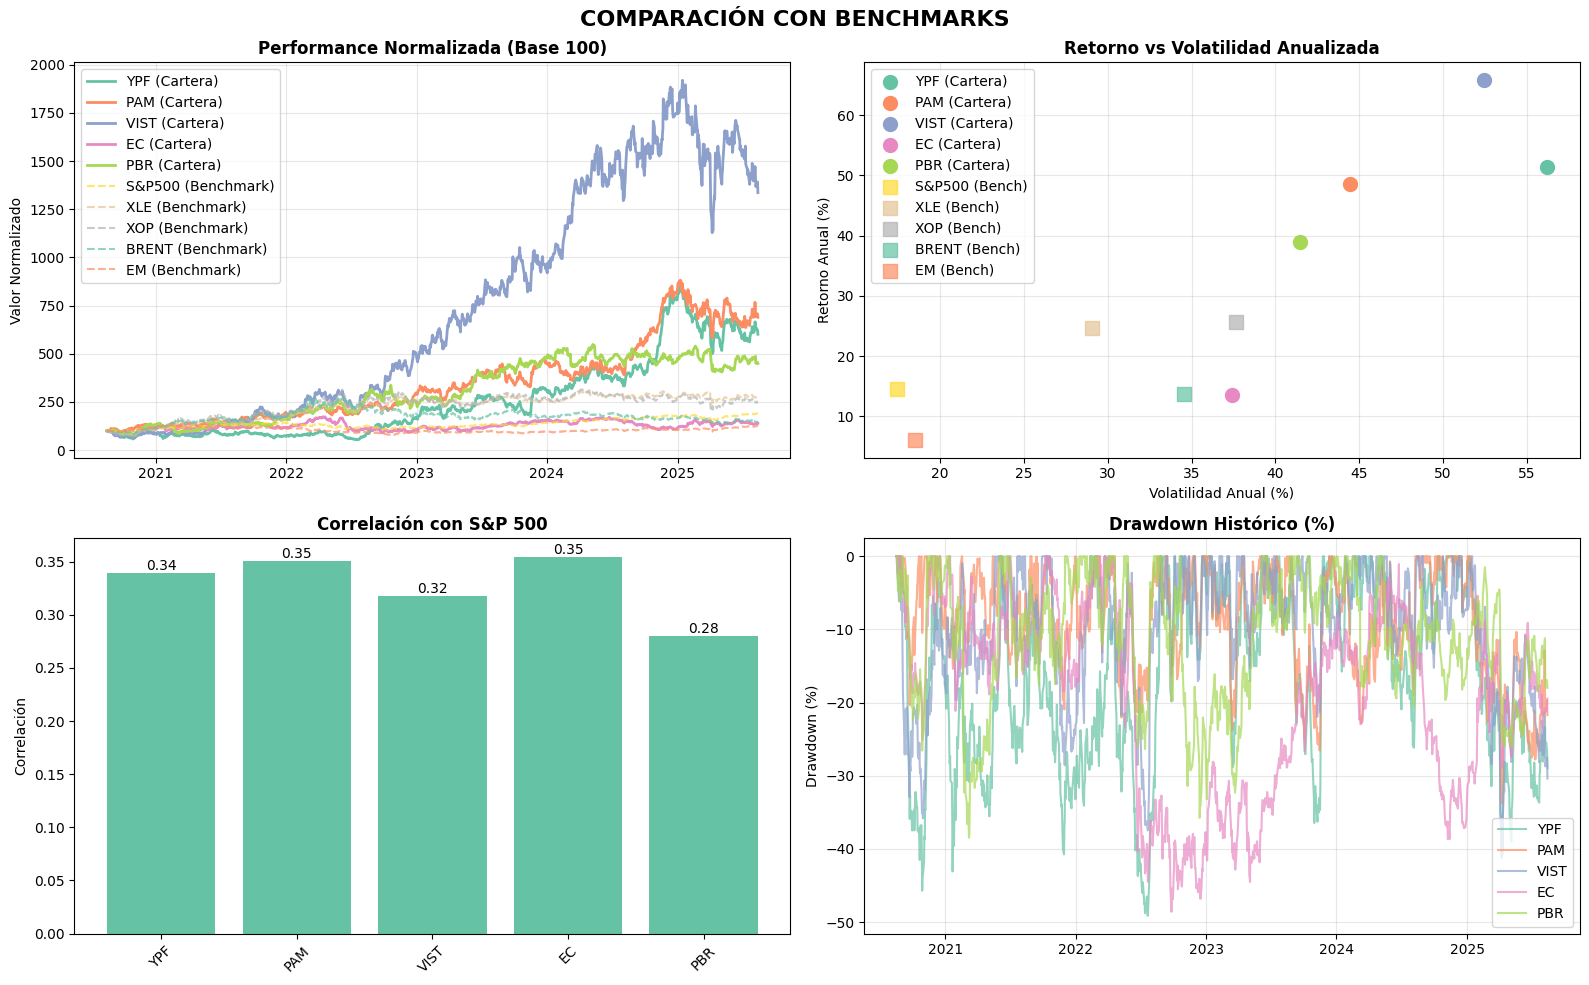

In [47]:
print("COMPARACIÓN CON BENCHMARKS")
print("-" * 60)

if len(precios_benchmarks) > 0:

    # Calcular retornos de benchmarks
    retornos_benchmarks = precios_benchmarks.pct_change().dropna()

    # Estadísticas comparativas
    print("📊 ESTADÍSTICAS COMPARATIVAS CON BENCHMARKS:")
    bench_stats = pd.DataFrame({
        'Valor_Inicial': precios_benchmarks.iloc[0],
        'Valor_Final': precios_benchmarks.iloc[-1],
        'Retorno_Total_%': ((precios_benchmarks.iloc[-1] / precios_benchmarks.iloc[0]) - 1) * 100,
        'Volatilidad_Anual_%': retornos_benchmarks.std() * np.sqrt(252) * 100,
        'Sharpe_Aproximado': (retornos_benchmarks.mean() * 252) / (retornos_benchmarks.std() * np.sqrt(252))
    })
    print(bench_stats.round(2))

    # Comparación visual
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('COMPARACIÓN CON BENCHMARKS', fontsize=16, fontweight='bold')

    # 1. Performance normalizada
    ax1 = axes[0, 0]

    # Normalizar cartera
    cartera_norm = (precios_cartera / precios_cartera.iloc[0]) * 100
    for col in cartera_norm.columns:
        ax1.plot(cartera_norm.index, cartera_norm[col], label=f"{col} (Cartera)", linewidth=2)

    # Normalizar benchmarks
    bench_norm = (precios_benchmarks / precios_benchmarks.iloc[0]) * 100
    for col in bench_norm.columns:
        ax1.plot(bench_norm.index, bench_norm[col], label=f"{col} (Benchmark)", linestyle='--', alpha=0.7)

    ax1.set_title('Performance Normalizada (Base 100)', fontweight='bold')
    ax1.set_ylabel('Valor Normalizado')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Retorno vs Volatilidad
    ax2 = axes[0, 1]

    # Cartera
    for col in retornos_diarios.columns:
        ret_anual = retornos_diarios[col].mean() * 252 * 100
        vol_anual = retornos_diarios[col].std() * np.sqrt(252) * 100
        ax2.scatter(vol_anual, ret_anual, label=f"{col} (Cartera)", s=100)

    # Benchmarks
    for col in retornos_benchmarks.columns:
        ret_anual = retornos_benchmarks[col].mean() * 252 * 100
        vol_anual = retornos_benchmarks[col].std() * np.sqrt(252) * 100
        ax2.scatter(vol_anual, ret_anual, label=f"{col} (Bench)", marker='s', s=100, alpha=0.7)

    ax2.set_title('Retorno vs Volatilidad Anualizada', fontweight='bold')
    ax2.set_xlabel('Volatilidad Anual (%)')
    ax2.set_ylabel('Retorno Anual (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Correlación con S&P 500
    if 'S&P500' in retornos_benchmarks.columns:
        ax3 = axes[1, 0]
        correlaciones_sp500 = retornos_diarios.corrwith(retornos_benchmarks['S&P500'])
        bars = ax3.bar(correlaciones_sp500.index, correlaciones_sp500.values)
        ax3.set_title('Correlación con S&P 500', fontweight='bold')
        ax3.set_ylabel('Correlación')
        ax3.tick_params(axis='x', rotation=45)

        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom')

    # 4. Drawdown comparativo
    ax4 = axes[1, 1]

    # Calcular drawdowns para cartera
    for col in cartera_norm.columns:
        rolling_max = cartera_norm[col].expanding().max()
        drawdown = (cartera_norm[col] / rolling_max - 1) * 100
        ax4.plot(drawdown.index, drawdown, label=f"{col}", alpha=0.7)

    ax4.set_title('Drawdown Histórico (%)', fontweight='bold')
    ax4.set_ylabel('Drawdown (%)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

### *Pregunta Critica*

¿Qué criterios utilizaste para seleccionar empresas comparables y por qué estos criterios son relevantes para un inversor argentino?

Para seleccionar empresas comparables con YPF se comenzo con empresas que estan cotizando en NYSE (USD) para eliminar el riesgo cambiario. Se eligio empresas dentro de la region de Latinoamerica para que si hay riegos geopoliticos o cambio regulatorios en la region afecten de la misma forma. Ademas se busco modelos de negocios similares para nuestro sector.
